In [39]:
import pandas as pd
import numpy as np

input_path = 'dataset/cleaned_data_export.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((2736, 79), (2736,))

In [40]:
train.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5.0,0.0,51.000000,16.877316,46.0,50.8,69.755044,81.823411,117.127926,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,9.0,0.0,65.159266,14.035590,48.0,46.0,75.000000,70.000000,122.000000,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.0,1.0,71.000000,16.648696,56.5,75.6,65.000000,94.000000,117.000000,20.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.0,0.0,71.000000,18.292347,56.0,81.6,60.000000,97.000000,117.000000,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,13.0,1.0,50.000000,22.279952,59.5,112.2,60.000000,73.000000,102.000000,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


 - Primo modello basilare: Random Forest

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=0)

In [ ]:
acc   = []
score = []

lower_bound = 40
upper_bound = 80
cross_valid = 5

for t in range(lower_bound, upper_bound):
    model = RandomForestClassifier(n_estimators=t)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    score.append(cross_val_score(model, train, y, cv=cross_valid).mean())

best_acc         = max(acc)     
best_acc_param   = acc.index(max(acc)) + lower_bound
best_score       = max(score)    
best_score_param = score.index(max(score)) + lower_bound

print("Best accuracy: ", best_acc, "with n_estimators = ", best_acc_param) 
print("Best score: ",  max(score), "with n_estimators = ", best_score_param)

Best accuracy:  0.5821167883211679 with n_estimators =  47
Best score:  0.6059895381577015 with n_estimators =  77


 - Dai risultati di questo modello basilare procedo ad effettuare migliorie. Mi ricavo la feature importance e droppo le feature meno importanti per la mia classificazione

Feature Importance:  [np.float64(0.040801387067112456), np.float64(0.04033745110872114), np.float64(0.038862779969329915), np.float64(0.037322960173360016), np.float64(0.03551658510209066), np.float64(0.03426775414857171), np.float64(0.031155146462341125), np.float64(0.030462379531086988), np.float64(0.029380618779049555), np.float64(0.029337470413565287), np.float64(0.02730105266109015), np.float64(0.027231147887601736), np.float64(0.023126491698909922), np.float64(0.022035761231155377), np.float64(0.020783914419316672), np.float64(0.020583457730972327), np.float64(0.019913277551231515), np.float64(0.0198670925059451), np.float64(0.019586937503236396), np.float64(0.019291802255896186), np.float64(0.019111661022421084), np.float64(0.01830275465784848), np.float64(0.018280648530868155), np.float64(0.018135543357977138), np.float64(0.01804262537240443), np.float64(0.017483897824116166), np.float64(0.017364823822189374), np.float64(0.017298063873776044), np.float64(0.016854431444525374), 

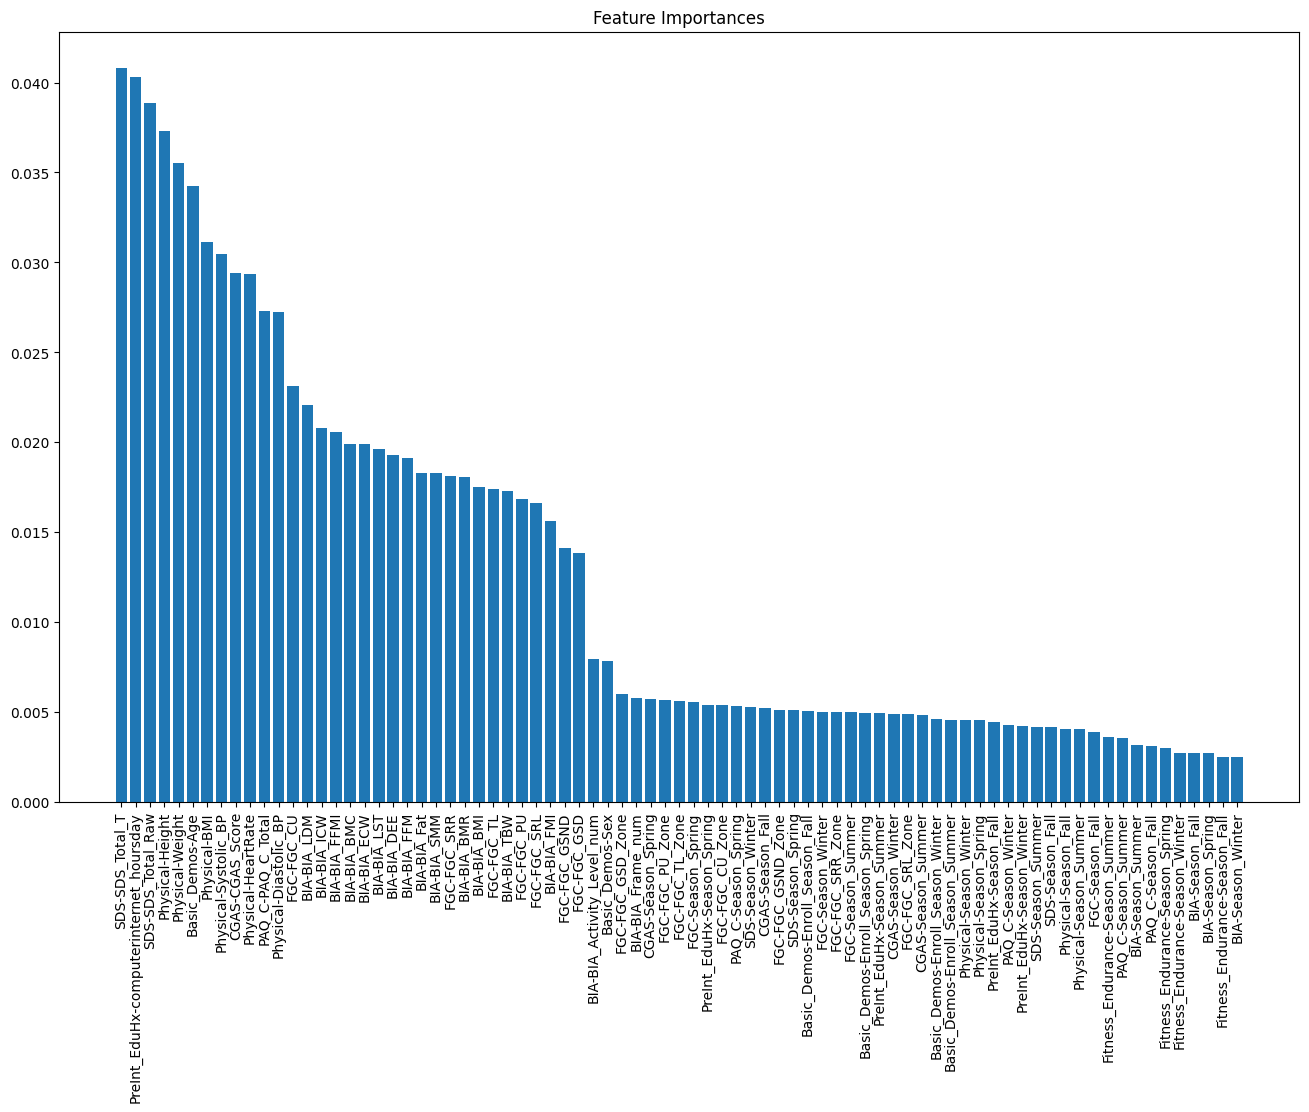

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Feature Importance: ", sorted(model.feature_importances_)[::-1])

fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(range(0, X_train.shape[1]), sorted(model.feature_importances_)[::-1])
ax.set_title("Feature Importances")
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(X_train.columns[np.argsort(model.feature_importances_)[::-1]], rotation=90)
plt.show()

In [44]:
#drop the least important features
from sklearn.feature_selection import RFECV

rf_small = RandomForestClassifier(n_estimators=best_acc_param)

selector = RFECV(rf_small, step=1, cv=cross_valid,
                 scoring='accuracy',        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                 min_features_to_select=1)

selector.fit(X_train,y_train);

In [47]:
print (f"Number of selected features: {selector.n_features_}")
print (f"Selected features: {X_train.columns[selector.support_]}")
print (f"Accuracy: {selector.score(X_val, y_val)}")

Number of selected features: 46
Selected features: Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW',
       'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW',
       'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday',
       'Basic_Demos-Enroll_Season_Spring', 'CGAS-Season_Fall',
       'CGAS-Season_Spring', 'CGAS-Season_Summer', 'FGC-Season_Spring',
       'FGC-Season_Winter', 'SDS-Season_Spring', 'PreInt_EduHx-Season_

AttributeError: 'RFECV' object has no attribute 'feature_importances_'